In [2]:
# Importing the Keras libraries and packages
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
dress_patterns_df = pd.read_csv('dress_patterns.csv')
dress_patterns = dress_patterns_df.values
dress_patterns_df.head()

_unit_id   category  category:confidence  \
0  851505458       ikat               0.3487   
1  851505459      plain               1.0000   
2  851505460  polka dot               0.6709   
3  851505461      plain               1.0000   
4  851505462   geometry               0.7035   

                                           image_url  
0  http://s3-eu-west-1.amazonaws.com/we-attribute...  
1  http://s3-eu-west-1.amazonaws.com/we-attribute...  
2  http://s3-eu-west-1.amazonaws.com/we-attribute...  
3  http://s3-eu-west-1.amazonaws.com/we-attribute...  
4  http://s3-eu-west-1.amazonaws.com/we-attribute...

In [4]:
print(os.listdir('dataset_category'))
print(os.listdir('dataset_category/animal'))

['animal', 'cartoon', 'chevron', 'floral', 'geometry', 'houndstooth', 'ikat', 'letter_numb', 'OTHER', 'plain', 'polka dot', 'scales', 'skull', 'squares', 'stars', 'stripes', 'tribal']
['851505476.jpg', '851505500.jpg', '851505502.jpg', '851505510.jpg', '851505618.jpg', '851505668.jpg', '851505905.jpg', '851505952.jpg', '851505967.jpg', '851506149.jpg', '851506312.jpg', '851506327.jpg', '851506342.jpg', '851506347.jpg', '851506516.jpg', '851506519.jpg', '851506556.jpg', '851506566.jpg', '851506616.jpg', '851506728.jpg', '851506836.jpg', '851506875.jpg', '851506933.jpg', '851506960.jpg', '851506974.jpg', '851507033.jpg', '851507038.jpg', '851507064.jpg', '851507105.jpg', '851507127.jpg', '851507198.jpg', '851507211.jpg', '851507216.jpg', '851507284.jpg', '851507677.jpg', '851507680.jpg', '851507702.jpg', '851507724.jpg', '851507841.jpg', '851507945.jpg', '851507954.jpg', '851508074.jpg', '851508076.jpg', '851508089.jpg', '851508253.jpg', '851508293.jpg', '851508301.jpg', '851508475.jpg',

In [5]:

classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 17, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Load Training and Testing Data
try:
    training_set = train_datagen.flow_from_directory('dataset_category', 
                                                     target_size = (64, 64),
                                                     batch_size = 32,
                                                     class_mode = 'categorical')
    
    test_set = test_datagen.flow_from_directory('dataset_category_test', 
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'categorical')
    
except Exception as e:
    print("Error loading images:", str(e))

# Rest of your code for model training


Found 12561 images belonging to 17 classes.
Found 3141 images belonging to 17 classes.


In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [8]:
for epoch in range(5):
    print("Epoch ",epoch+1 )
    for batch in training_set:
        images, labels =batch
        classifier.fit(images, labels)
    
    test_accuracy = classifier.evaluate(test_set, verbose=0)[1]
    print("Test accuracy:", test_accuracy)

Epoch  1
1/1 [==============================] - 11s 11s/step - loss: 0.0488 - accuracy: 0.8438


In [ ]:
# Save Model to Disk
# serialize model to JSON
model_json = classifier.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model1.h5")
print("Saved model to disk")
 

NameError: name 'classifier' is not defined

#  TEST single image

In [ ]:
os.listdir('dataset_category_test/plain')

['851505459.jpg',
 '851505461.jpg',
 '851505464.jpg',
 '851505465.jpg',
 '851505467.jpg',
 '851505469.jpg',
 '851505470.jpg',
 '851505473.jpg',
 '851505474.jpg',
 '851505479.jpg',
 '851505481.jpg',
 '851505482.jpg',
 '851505486.jpg',
 '851505489.jpg',
 '851505496.jpg',
 '851505497.jpg',
 '851505501.jpg',
 '851505504.jpg',
 '851505506.jpg',
 '851505507.jpg',
 '851505509.jpg',
 '851505512.jpg',
 '851505513.jpg',
 '851505519.jpg',
 '851505521.jpg',
 '851505523.jpg',
 '851505529.jpg',
 '851505531.jpg',
 '851505533.jpg',
 '851505534.jpg',
 '851505541.jpg',
 '851505542.jpg',
 '851505544.jpg',
 '851505547.jpg',
 '851505551.jpg',
 '851505557.jpg',
 '851505562.jpg',
 '851505563.jpg',
 '851505565.jpg',
 '851505567.jpg',
 '851505574.jpg',
 '851505578.jpg',
 '851505579.jpg',
 '851505581.jpg',
 '851505583.jpg',
 '851505584.jpg',
 '851505585.jpg',
 '851505586.jpg',
 '851505590.jpg',
 '851505593.jpg',
 '851505594.jpg',
 '851505602.jpg',
 '851505604.jpg',
 '851505605.jpg',
 '851505607.jpg',
 '85150560

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset_category_test/plain/851505531.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [ ]:
result[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
index = np.where(result[0] == 1)[0][0]
index

9

In [ ]:
list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]

'plain'

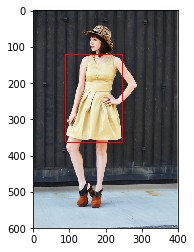

In [ ]:
img = cv2.imread('dataset_category_test/plain/851505531.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))